In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from hmc import HamiltonianMonteCarlo

In [3]:
def rosen(x, a, b):
    return np.exp(-((a-x[0])**2 + b*(x[1]-x[0]**2)**2)/20)

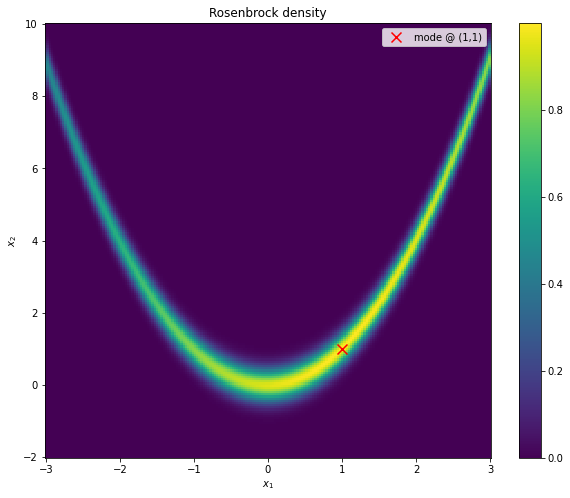

In [4]:
# Plot shape of distribution and its not-so-expected norm
a, b = 1, 100
def p(x):
    return rosen(x, a, b)

n_points = 200
x1 = np.linspace(-3, 3, n_points)
x2 = np.linspace(-2, 10, n_points)
X = np.meshgrid(x1,x2)
Y = p(X)

fig, ax = plt.subplots(figsize=(10,8))
c = ax.pcolor(X[0], X[1], Y)
fig.colorbar(c)
ax.scatter([1], [1], c='red', marker='x', s=100, label='mode @ (1,1)')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Rosenbrock density')
ax.legend()

In [5]:
# Run HMC on rosenbrock 
def logp_param(x, a, b):
    return -((a-x[0])**2 + b*(x[1]-x[0]**2)**2)/20

def grad_logp_param(x, a, b):
    return np.array([a-x[0] + 2*b*x[0]*(x[1]-x[0]**2),
                     b*(x[1]-x[0]**2)]) / 10

# with following parameters:
a,b = 1, 100  # for the distribution
eps, L = 0.01, 100  # sampler

def p(x):
    # Used to plot the distribution in the background
    return rosen(x, a, b)

def logp(x):
    return logp_param(x, a, b)

def grad_logp(x):
    return grad_logp_param(x, a, b)

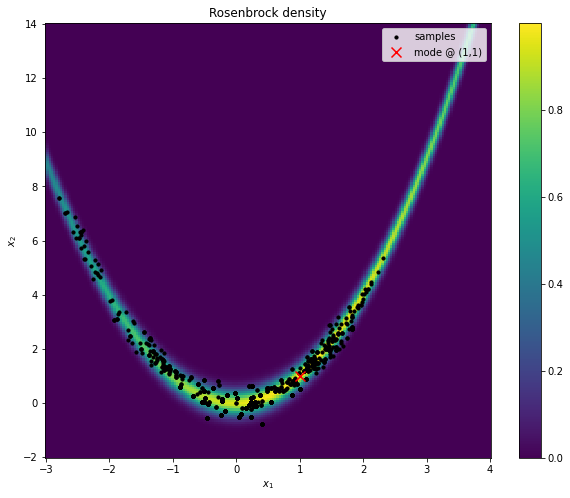

In [6]:
# Run and plot 1000 iterations
seed = 0
sampler = HamiltonianMonteCarlo(eps=eps, L=L, 
                                logp=logp, grad_logp=grad_logp,
                                num_iterations=1000,
                                seed=seed)
thetas = np.array(sampler.run(np.array([0, 0])))

n_points = 200
x1 = np.linspace(-3, 4, n_points)
x2 = np.linspace(-2, 14, n_points)
X = np.meshgrid(x1,x2)
Y = p(X)

fig, ax = plt.subplots(figsize=(10,8))
c = ax.pcolor(X[0], X[1], Y)
fig.colorbar(c)
ax.scatter(thetas[:,0], thetas[:,1], label='samples', c='black', s=10)
ax.scatter([1], [1], c='red', marker='x', s=100, label='mode @ (1,1)')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_title('Rosenbrock density')
ax.legend()
# fig.show()